In [21]:
import networkx as nx
from utils import print_graph
from networkx import Graph
import matplotlib.pyplot as plt
import numpy as np

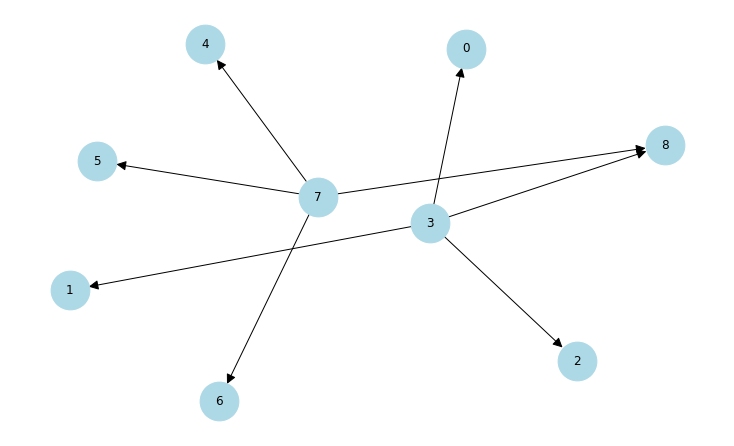

In [43]:
G = nx.DiGraph()
edges = [(7, 4), (3, 8), (3, 2), (3, 0), (3, 1), (7, 5), (7, 6), (7, 8)]
G.add_edges_from(edges)

plt.figure(figsize=(10,6))
pos = nx.spring_layout(G, scale=20, k=3/np.sqrt(G.order()))
nx.draw(G, pos, node_color='lightblue',
        with_labels=True,
        node_size=1500,
        arrowsize=20)

In [100]:
from itertools import combinations

H = nx.to_undirected(G)

nodelist = [0,4,6,7]
paths = {}
for nodes in combinations(nodelist, r=2):
    paths[nodes] = nx.shortest_path_length(H, *nodes)

print(paths)

{(0, 4): 4, (0, 6): 4, (0, 7): 3, (4, 6): 2, (4, 7): 1, (6, 7): 1}


In [101]:
# find the longest paths between all nodes
max_distance = max(paths.values())
longest_paths = ([k for k, v in paths.items() if v == max_distance])

In [102]:
# find all nodes on the way in the longest paths
all_nodes = nx.Graph()
for path in longest_paths:
        longest_induced_path = nx.shortest_path(H, *path)
        all_nodes.add_nodes_from(longest_induced_path)
print_graph(all_nodes)

List of nodes: 
	 0 {}
	 3 {}
	 8 {}
	 7 {}
	 4 {}
	 6 {}

List of edges: 
